<a href="https://colab.research.google.com/github/Kanishka2020/GripTSF/blob/main/TSF%20Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Sparks Foundation - Data Science & Business Analytics Internship

##Task - 7: 

- Objective: 
  Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines.

- Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

###Author : Kanishka Gour


##Import the Libraries and datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
new_col_names = ['Data', 'Category', 'News']
news_df = pd.read_csv('india-news-headlines.csv', names=new_col_names)
news_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Data,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?


# New Section

In [ ]:
news_df.drop(0, inplace=True)
news_df.drop('Category', axis=1, inplace=True)
news_df.head()

,Data,News
1,20010101,win over cena satisfying but defeating underta...
2,20010102,Status quo will not be disturbed at Ayodhya; s...
3,20010102,Fissures in Hurriyat over Pak visit
4,20010102,America's unwanted heading for India?
5,20010102,For bigwigs; it is destination Goa


In [ ]:
import pandas_datareader as pdr

stock_data = pdr.get_data_yahoo('AMZN', start='2017-01-01',end='2020-12-15')
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
2017-01-09,801.770020,791.770020,798.000000,796.919983,3446100,796.919983
...,...,...,...,...,...,...
2020-12-09,3174.429932,3088.000000,3167.889893,3104.199951,4100800,3104.199951
2020-12-10,3142.100098,3076.000000,3088.989990,3101.489990,3030200,3101.489990
2020-12-11,3118.669922,3072.820068,3096.659912,3116.419922,3064700,3116.419922


In [ ]:
stock_data.to_csv('amzn.csv')

In [ ]:
df=pd.read_csv('amzn.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,758.760010,747.700012,757.919983,753.669983,3521100,753.669983
1,2017-01-04,759.679993,754.200012,758.390015,757.179993,2510500,757.179993
2,2017-01-05,782.400024,760.260010,761.549988,780.450012,5830100,780.450012
3,2017-01-06,799.440002,778.479980,782.359985,795.989990,5986200,795.989990
4,2017-01-09,801.770020,791.770020,798.000000,796.919983,3446100,796.919983


##Visualization

In [ ]:
df_1 = df.reset_index()['Close']
df_1.head()

0    753.669983
1    757.179993
2    780.450012
3    795.989990
4    796.919983
Name: Close, dtype: float64

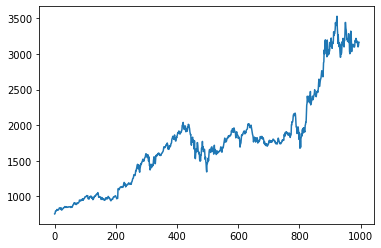

In [ ]:
plt.plot(df_1)

##Data Processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_1 = scaler.fit_transform(np.array(df_1).reshape(-1,1))
df_1

array([[0.        ],
       [0.0012636 ],
       [0.0096408 ],
       [0.01523519],
       [0.01556999],
       [0.0152028 ],
       [0.016326  ],
       [0.02158919],
       [0.02284919],
       [0.02017798],
       [0.01937158],
       [0.01993318],
       [0.0196776 ],
       [0.02311559],
       [0.02475719],
       [0.02982599],
       [0.03077279],
       [0.02955599],
       [0.02761559],
       [0.02513158],
       [0.02832478],
       [0.03106079],
       [0.02035079],
       [0.0194292 ],
       [0.02117879],
       [0.0237744 ],
       [0.02436838],
       [0.02656439],
       [0.02982959],
       [0.02977919],
       [0.03205079],
       [0.03256919],
       [0.03290398],
       [0.03699718],
       [0.03669837],
       [0.03546718],
       [0.03296518],
       [0.03418918],
       [0.03289317],
       [0.03578758],
       [0.03428637],
       [0.03463558],
       [0.03345837],
       [0.03324599],
       [0.03485878],
       [0.03575878],
       [0.03556439],
       [0.036

##Splitting the Dataset

In [ ]:
train_size=int(len(df_1)*0.65)
test_size=len(df_1)-train_size
train_data,test_data=df_1[0:train_size,:],df_1[train_size:len(df_1),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
  datax,datay=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax),np.array(datay)

In [ ]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [ ]:
x_train

array([[0.        , 0.0012636 , 0.0096408 , ..., 0.07843314, 0.08160473,
        0.08629554],
       [0.0012636 , 0.0096408 , 0.01523519, ..., 0.08160473, 0.08629554,
        0.08715955],
       [0.0096408 , 0.01523519, 0.01556999, ..., 0.08629554, 0.08715955,
        0.08749074],
       ...,
       [0.33929975, 0.33795336, 0.32950053, ..., 0.44350526, 0.44669485,
        0.44897007],
       [0.33795336, 0.32950053, 0.31402054, ..., 0.44669485, 0.44897007,
        0.43925364],
       [0.32950053, 0.31402054, 0.31216658, ..., 0.44897007, 0.43925364,
        0.42817649]])

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((546, 100, 1), (248, 100, 1), (546,), (248,))

##Tensorflow Models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


##Model Training

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 5s 210ms/step - loss: 0.0471 - val_loss: 0.0042
Epoch 2/100
9/9 [==============================] - 1s 122ms/step - loss: 0.0053 - val_loss: 0.0520
Epoch 3/100
9/9 [==============================] - 1s 120ms/step - loss: 0.0034 - val_loss: 0.0054
Epoch 4/100
9/9 [==============================] - 1s 120ms/step - loss: 0.0017 - val_loss: 0.0143
Epoch 5/100
9/9 [==============================] - 1s 122ms/step - loss: 0.0010 - val_loss: 0.0057
Epoch 6/100
9/9 [==============================] - 1s 126ms/step - loss: 7.2382e-04 - val_loss: 0.0038
Epoch 7/100
9/9 [==============================] - 1s 120ms/step - loss: 5.9209e-04 - val_loss: 0.0030
Epoch 8/100
9/9 [==============================] - 1s 122ms/step - loss: 5.3553e-04 - val_loss: 0.0028
Epoch 9/100
9/9 [==============================] - 1s 120ms/step - loss: 5.7990e-04 - val_loss: 0.0026
Epoch 10/100
9/9 [==============================] - 1s 121ms/step - loss: 5.3780e-04 - val_lo

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

##Mean Squarred Mean

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1555.4770738399661

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

2541.862802897271

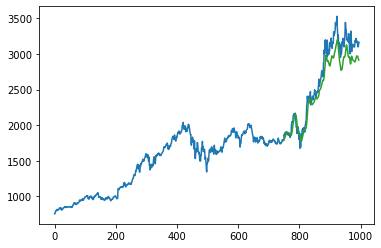

In [ ]:
look_back=100
trainpredictplot=np.empty_like(df_1)
trainpredictplot[:, :]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]+train_predict
#Shif test predict for plot
testpredictplot=np.empty_like(df_1)
testpredictplot[:, :]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df_1)-1:]=test_predict

plt.plot(scaler.inverse_transform(df_1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

##Prediction

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df_1)

996

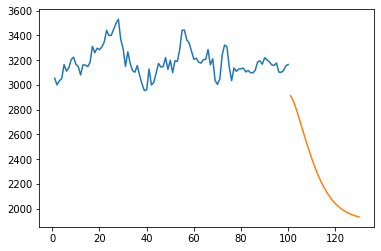

In [ ]:
x_input=test_data[248:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    x_input=x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    list_output.extend(yhat.tolist())
    i=i+1

plt.plot(day_new,scaler.inverse_transform(df_1[896:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output));

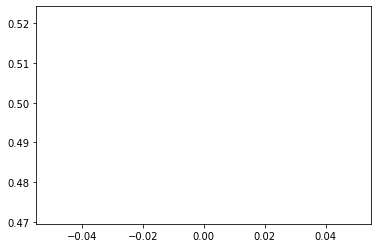

In [ ]:
df3=df_1.tolist()
df3.extend(lst_output)
plt.plot(df3[780]);

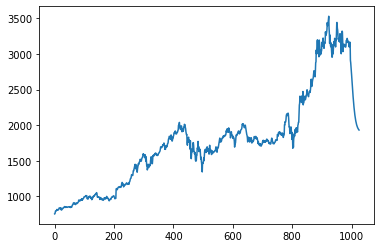

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)